In [1]:
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/home/prem/Data Analytics with Python/data/oneway.xlsx")

In [3]:
data = data.drop(['S.No.'],axis= 1)

In [4]:
data

,Teaching Methods1,Teaching Method 2,Teaching Method 3
0,4,2,2
1,3,4,1
2,2,6,3


In [5]:
data.rename(columns = { "Teaching Methods1" : "Teaching Method 1"},inplace = True)
data

,Teaching Method 1,Teaching Method 2,Teaching Method 3
0,4,2,2
1,3,4,1
2,2,6,3


In [6]:
data_new = pd.melt(data.reset_index(),id_vars=['index'],value_vars = ['Teaching Method 1','Teaching Method 2','Teaching Method 3'])
data_new

,index,variable,value
0,0,Teaching Method 1,4
1,1,Teaching Method 1,3
2,2,Teaching Method 1,2
3,0,Teaching Method 2,2
4,1,Teaching Method 2,4
5,2,Teaching Method 2,6
6,0,Teaching Method 3,2
7,1,Teaching Method 3,1
8,2,Teaching Method 3,3


In [11]:
data_new.columns = ['id','Treatments','value']

In [12]:
model = ols('value~C(Treatments)',data=data_new).fit()

In [13]:
anova_table = sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,6.0,3.0,1.5,0.296296
Residual,6.0,12.0,2.0,NaN,NaN


In [14]:
stats.norm.ppf(0.05),stats.norm.ppf(1-0.05)

(-1.6448536269514729, 1.6448536269514722)

##### Post Hoc Analysis

A completely randomised single factor experiment

Problem on tensile strength of paper!

In [15]:
fivepercent = [7,8,15,11,9,10]
tenpercent = [12,17,13,18,19,15]
fifteenpercent = [14,18,19,17,16,18]
twentypercent = [19,25,22,23,18,20]

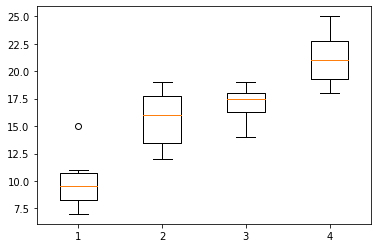

In [16]:
box_plot_data = [fivepercent,tenpercent,fifteenpercent,twentypercent]
plt.boxplot(box_plot_data)
plt.show()

In [17]:
scipy.stats.f.ppf(1-0.01,dfn = 3,dfd = 20)

4.938193382310539

In [18]:
scipy.stats.f_oneway(fivepercent,tenpercent,fifteenpercent,twentypercent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

If above data is in CSV file.
Import CSV using pandas tool

In [19]:
df = pd.read_csv("/home/prem/Data Analytics with Python/concentration.csv")
df

,concentration5,concentration10,concentration15,concentration20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [20]:
data_r1 = pd.melt(df.reset_index(),id_vars=['index'],value_vars=['concentration5','concentration10','concentration15','concentration20'])

In [21]:
data_r1.columns = ['index','treatments','value']

In [22]:
model = ols('value~C(treatments)',data=data_r1).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           3.59e-06
Time:                        08:20:30   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.concentration15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.concentration20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.concentration5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
anova_table = sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


###### LSD test

In [25]:
t = -1*scipy.stats.t.ppf(0.025,20)
n = 6
MSE = 6.508
LSD = t * math.sqrt(2*MSE/n)
LSD

3.072343986799344

##### Tukey Kramer Test for Post HOC Analysis

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [27]:
mc = MultiComparison(data_r1['value'],data_r1['treatments'])
mc_result = mc.tukeyhsd(0.05)
mc_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
concentration10,concentration15,1.3333,0.7827,-2.7894,5.4561,False
concentration10,concentration20,5.5,0.0066,1.3773,9.6227,True
concentration10,concentration5,-5.6667,0.0051,-9.7894,-1.5439,True
concentration15,concentration20,4.1667,0.047,0.0439,8.2894,True
concentration15,concentration5,-7.0,0.001,-11.1227,-2.8773,True
concentration20,concentration5,-11.1667,0.001,-15.2894,-7.0439,True


#### Problem:

Given dataframe shows observed tensile strength (lb/in square) of different clothes having different percentage of cotton. 
check whether having different weight percentage of cotton, plays any role in tensile strength (lb/in square) of clothes.

In [28]:
df3 = pd.read_excel("/home/prem/Data Analytics with Python/data/cloth_tensile_strength.xlsx")
df3

,cotwt.15,cotwt.20,cotwt.25,cotwt.30,cotwt.35
0,7,12,14,19,7
1,7,17,18,25,10
2,15,12,18,22,11
3,11,18,19,19,15
4,9,18,19,23,11


In [29]:
data1 = pd.melt(df3.reset_index(),id_vars = ['index'], value_vars = ['cotwt.15','cotwt.20','cotwt.25','cotwt.30','cotwt.35'])
data1.columns = ['id','treatments','value']

In [30]:
data1.head(7)

,id,treatments,value
0,0,cotwt.15,7
1,1,cotwt.15,7
2,2,cotwt.15,15
3,3,cotwt.15,11
4,4,cotwt.15,9
5,0,cotwt.20,12
6,1,cotwt.20,17


In [31]:
mc = MultiComparison(data1['value'],data1['treatments'])
mcresults = mc.tukeyhsd(0.05)
mcresults.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
cotwt.15,cotwt.20,5.6,0.0385,0.2266,10.9734,True
cotwt.15,cotwt.25,7.8,0.0026,2.4266,13.1734,True
cotwt.15,cotwt.30,11.8,0.001,6.4266,17.1734,True
cotwt.15,cotwt.35,1.0,0.9,-4.3734,6.3734,False
cotwt.20,cotwt.25,2.2,0.7148,-3.1734,7.5734,False
cotwt.20,cotwt.30,6.2,0.0189,0.8266,11.5734,True
cotwt.20,cotwt.35,-4.6,0.1165,-9.9734,0.7734,False
cotwt.25,cotwt.30,4.0,0.2102,-1.3734,9.3734,False
cotwt.25,cotwt.35,-6.8,0.0091,-12.1734,-1.4266,True
cotwt.30,cotwt.35,-10.8,0.001,-16.1734,-5.4266,True


### Randomized Block Design

Solve anova problem with no blocking!

In [32]:
df = pd.read_csv("/home/prem/Data Analytics with Python/data/Air_traffic.csv")
df

,controller,system A,system B,system C
0,1,15,15,18
1,2,14,14,14
2,3,10,11,15
3,4,13,12,17
4,5,16,13,16
5,6,13,13,13


In [33]:
data = pd.melt(df.reset_index(),id_vars=['index'],value_vars=['system A','system B','system C'])
data

,index,variable,value
0,0,system A,15
1,1,system A,14
2,2,system A,10
3,3,system A,13
4,4,system A,16
5,5,system A,13
6,0,system B,15
7,1,system B,14
8,2,system B,11
9,3,system B,12


In [34]:
data.columns = ['index','treatments','value']
data.head()

,index,treatments,value
0,0,system A,15
1,1,system A,14
2,2,system A,10
3,3,system A,13
4,4,system A,16


In [35]:
model = ols('value~C(treatments)',data = data).fit()

In [36]:
anova_table = sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


In [50]:
stats.f.ppf(1-0.025,dfnmodel = ols('value~C(block)+C(treatments)',data=data).fit()
anova_table = sm.stats.anova_lm(model,typ=1)
anova_table=2,dfd=15)

4.765048283888203

we do not reject NULL HYPOTHESIS.

###### Solve anova problem with blocking

Use above data for modelling

In [52]:
data = pd.melt(df.reset_index(),id_vars=['index'],value_vars = ['system A','system B','system C'])
data.columns = ['block','treatments','value']

In [53]:
model = ols('value~C(block)+C(treatments)',data=data).fit()
anova_table = sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(block),5.0,30.0,6.0,3.157895,0.057399
C(treatments),2.0,21.0,10.5,5.526316,0.024181
Residual,10.0,19.0,1.9,NaN,NaN


In [55]:
stats.f.ppf(1-0.025,dfn=2,dfd=15) #critical point

4.765048283888203

f-measure of treatments is greater than critical point. So, we reject null hyposthesis.

#### Problem: (Randomized Blocked Design)

An experiment was performed to detemine the effect of four different chemicals on the strength of a fabric. There chemicals are used as part of the permanent press finishing process. Five fabric samples were selected, and a randomized complete block design was run by testing each chemical type once in random order on each fabric sample.
The data are in csv file. 
we will test for differences in means using an anova with alpha = 0.01

In [67]:
df = pd.read_csv("/home/prem/Data Analytics with Python/data/chemical_fabric_strength.csv")
df.head()

,Samples,chem1,chem2,chem3,chem4
0,fabric_sample_1,1.3,2.2,1.8,3.9
1,fabric_sample_2,1.6,2.4,1.7,4.4
2,fabric_sample_3,0.5,0.4,0.6,2.0
3,fabric_sample_4,1.2,2.0,1.5,4.1
4,fabric_sample_5,1.1,1.8,1.3,3.4


In [69]:
data = pd.melt(df.reset_index(),id_vars = ['index'],value_vars = ['chem1','chem2','chem3','chem4'])
data.head(7)

,index,variable,value
0,0,chem1,1.3
1,1,chem1,1.6
2,2,chem1,0.5
3,3,chem1,1.2
4,4,chem1,1.1
5,0,chem2,2.2
6,1,chem2,2.4


In [70]:
data.columns = ['index','treatments','value']

In [71]:
model = ols('value~C(treatments)',data = data).fit()
anva_table = sm.stats.anova_lm(model,typ=1)
anva_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,18.044,6.014667,12.589569,0.000176
Residual,16.0,7.644,0.477750,NaN,NaN


In [72]:
stats.f.ppf(1-0.01,dfn=3,dfd=16)

5.2922140455209465

f-measure for treatments is far greater than critical f measure. So, Here we reject Null Hypothesis!

###### Using Blocking

In [84]:
data = pd.melt(df.reset_index(), id_vars = ['index'],value_vars = ['chem1','chem2','chem3','chem4'])
data.columns = ['block','chemical','value']
data

,block,chemical,value
0,0,chem1,1.3
1,1,chem1,1.6
2,2,chem1,0.5
3,3,chem1,1.2
4,4,chem1,1.1
5,0,chem2,2.2
6,1,chem2,2.4
7,2,chem2,0.4
8,3,chem2,2.0
9,4,chem2,1.8


In [85]:
model = ols('value~C(block)+C(chemical)',data = data).fit()
anova_table = sm.stats.anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(block),4.0,6.693,1.673250,21.113565,2.318913e-05
C(chemical),3.0,18.044,6.014667,75.894848,4.518310e-08
Residual,12.0,0.951,0.079250,NaN,NaN


In [86]:
stats.f.ppf(1-0.01,dfn=3,dfd=12) #critical value

5.952544681545868

Since, f-measure = 75.89 > f(0.01,3,12) = 5.95.
So, we conclude that ther is a significant difference in the chemical types. so far as their effect on strength is concerned.

### Two way anova

In [88]:
df1 = pd.read_csv("/home/prem/Data Analytics with Python/data/2WAY.csv")
df1

,college,prep_program,value
0,BUSSINESS,THREE HOUR REVIEWS,500
1,BUSSINESS,THREE HOUR REVIEWS,580
2,BUSSINESS,ONE DAY PROGRAM,460
3,BUSSINESS,ONE DAY PROGRAM,540
4,BUSSINESS,10 WEEK COURSE,560
5,BUSSINESS,10 WEEK COURSE,600
6,ENGINEERING,THREE HOUR REVIEWS,540
7,ENGINEERING,THREE HOUR REVIEWS,460
8,ENGINEERING,ONE DAY PROGRAM,560
9,ENGINEERING,ONE DAY PROGRAM,620


In [90]:
formula = 'value~C(college)+C(prep_program)+C(college):C(prep_program)'
model = ols(formula,df1).fit()
aov_table = sm.stats.anova_lm(model,typ=2)

In [91]:
aov_table

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_program),6100.0,2.0,1.382872,0.299436
C(college):C(prep_program),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN
